<a href="https://colab.research.google.com/github/Hanover-CS/HC22-HirokiNakano-SeniorProject/blob/main/PredictionModelMaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Enter your preferred settings as an integer


INPUT_LEN = 20#@param{type:"number"}
EPOCHS =  10#@param{type:"number"}
BATCH_SIZE =  50#@param{type:"number"}
numOfHiddenLayers =  5#@param{type:"number"}

#@markdown <big>type your name (or nickname)
name = "lauren" #@param{type:"string"}

#@markdown <big>then click "Runtime" -> "Run all". scroll down to check your result. 


Note:
**Input_len** means how many consecutive days used to predict the next day's price.

---


**Epochs** means how many time do you train your model with the test data. It is lke how many times you study with the same textbook.


---

**Batch_size** is the interval at which the model is updated in training. The less it is, the more frequently it is updated. It's like taking a break after studying a specific number of chapters.


---

**numOfHiddenLayers** is a number of hidden layers which you want to put into your model. The more number may give you more accurate model but it takes long time and a lot of GPU resource.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time
HIST_PATH = '/content/drive/MyDrive/ColabNotebooks/ForEX_AI/dollar-yen-exchange-rate-historical-chart.csv'
# HIST_PATH = '/content/drive/MyDrive/ColabNotebooks/ForEX_AI/euro-dollar-exchange-rate-historical-chart.csv'
# HIST_PATH = '/content/drive/MyDrive/ColabNotebooks/ForEX_AI/pound-dollar-exchange-rate-historical-chart.csv'
RegularizationFlag = False
RANKING_PATH = "/content/drive/MyDrive/ColabNotebooks/ForEX_AI/ranking.csv"

In [ ]:
# show current ranking
from google.colab import data_table
data_table.enable_dataframe_formatter()
df_ranking = pd.read_csv(RANKING_PATH)
display(df_ranking)

,name,score,MSE,runtime,input len,epochs,batch size,hidden layers
0,Hiro test5,11.940413,2.032155,5.875740,15,5,32,2
1,Hiro test2,12.668916,1.614539,7.846772,10,5,10,3
2,Hiro test6,12.672963,2.032155,6.236219,15,5,32,2
3,Hiro test3,19.770041,1.727522,11.444163,20,10,20,20
4,Hiro test1,29.605780,2.331352,12.698976,2,2,2,2
5,Hiro test4,690.192848,4.015502,171.882090,10,100,10,5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# timer start
start_time = time.process_time()
df = pd.read_csv(HIST_PATH, header=1, usecols=[1])
print(df)

       357.7300
0      357.8100
1      357.8600
2      357.8700
3      357.8200
4      357.9500
...         ...
12969  109.7820
12970  109.9275
12971  109.9275
12972  110.0350
12973  110.0710

[12974 rows x 1 columns]


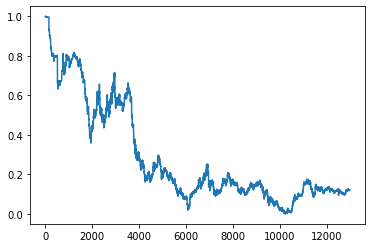

In [ ]:
# Change rates into 0-1 scale. The highest rate is 1, the lowest is 0
sc = MinMaxScaler(feature_range=(0,1))
prices = sc.fit_transform(df)
fig, ax = plt.subplots()
x = np.arange(len(prices))
ax.plot(x, prices)

In [ ]:
# create a set of inputs that correspond to INPUT_LEN, and its output.
def create_data_for_model(prices):
  #input x=[x1, x2,...] -> output y

  X, Y = [], []
  prices_len = len(prices)
  for i, _ in enumerate(prices):
    if (i + INPUT_LEN + 1 >= prices_len):
      break
    X.append(prices[i:i + INPUT_LEN])
    Y.append(prices[i + INPUT_LEN + 1])
  
  X = np.array(X)
  Y = np.array(Y)

  split_index = int(len(prices) * 0.5)
  X_train = X[:split_index]
  Y_train = Y[:split_index]
  X_test = X[split_index:]
  Y_test = Y[split_index:]

  return X_train, Y_train, X_test, Y_test

In [ ]:
X_train, Y_train, X_test, Y_test = create_data_for_model(prices)

In [ ]:
# Fit into batch size
import math
idealTrainSize = len(X_train)//BATCH_SIZE
idealTrainSize = idealTrainSize * BATCH_SIZE
print(idealTrainSize)
X_train = X_train[:idealTrainSize]
Y_train = Y_train[:idealTrainSize]
print(len(X_train))
print(len(Y_train))

idealTestSize = len(X_test)//BATCH_SIZE
idealTestSize = idealTestSize * BATCH_SIZE
print(idealTestSize)
X_test = X_test[:idealTestSize]
Y_test = Y_test[:idealTestSize]
print(len(X_test))
print(len(Y_test))

6450
6450
6450
6450
6450
6450


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
import matplotlib.pyplot as plt
import json

In [ ]:
tensorflow.random.set_seed(0)

# Creating a model
model = Sequential()
model.add(Flatten(input_shape=[INPUT_LEN, 1]))
# add hidden layers
if numOfHiddenLayers<1:
  numOfHiddenLayers = 1
for i in range(numOfHiddenLayers):
  if RegularizationFlag:
      model.add(Dense(32, kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
  else:
    model.add(Dense(32))
  model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("linear"))

In [ ]:
model.compile(loss="mse",   
              optimizer="adam")

In [ ]:
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
129/129 [==============================] - 1s 2ms/step - loss: 0.0147
Epoch 2/10
129/129 [==============================] - 0s 2ms/step - loss: 1.4044e-04
Epoch 3/10
129/129 [==============================] - 0s 2ms/step - loss: 1.2698e-04
Epoch 4/10
129/129 [==============================] - 0s 2ms/step - loss: 1.1198e-04
Epoch 5/10
129/129 [==============================] - 0s 2ms/step - loss: 9.1674e-05
Epoch 6/10
129/129 [==============================] - 0s 2ms/step - loss: 9.4090e-05
Epoch 7/10
129/129 [==============================] - 0s 2ms/step - loss: 7.8624e-05
Epoch 8/10
129/129 [==============================] - 0s 2ms/step - loss: 9.0911e-05
Epoch 9/10
129/129 [==============================] - 0s 2ms/step - loss: 7.8250e-05
Epoch 10/10
129/129 [==============================] - 0s 2ms/step - loss: 7.7995e-05


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                672       
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 activation_4 (Activation)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 activation_5 (Activation)   (None, 32)               

[[114.91931 ]
 [115.632095]
 [116.32182 ]
 ...
 [110.6243  ]
 [110.32729 ]
 [110.0054  ]]
[[116.13  ]
 [115.88  ]
 [115.77  ]
 ...
 [109.685 ]
 [109.9945]
 [110.053 ]]
min is [4.11987305e-05]
max is [16.51222839]
MSE  4.109381382077026 
process_time 4.775725375 
score  19.625276941937823


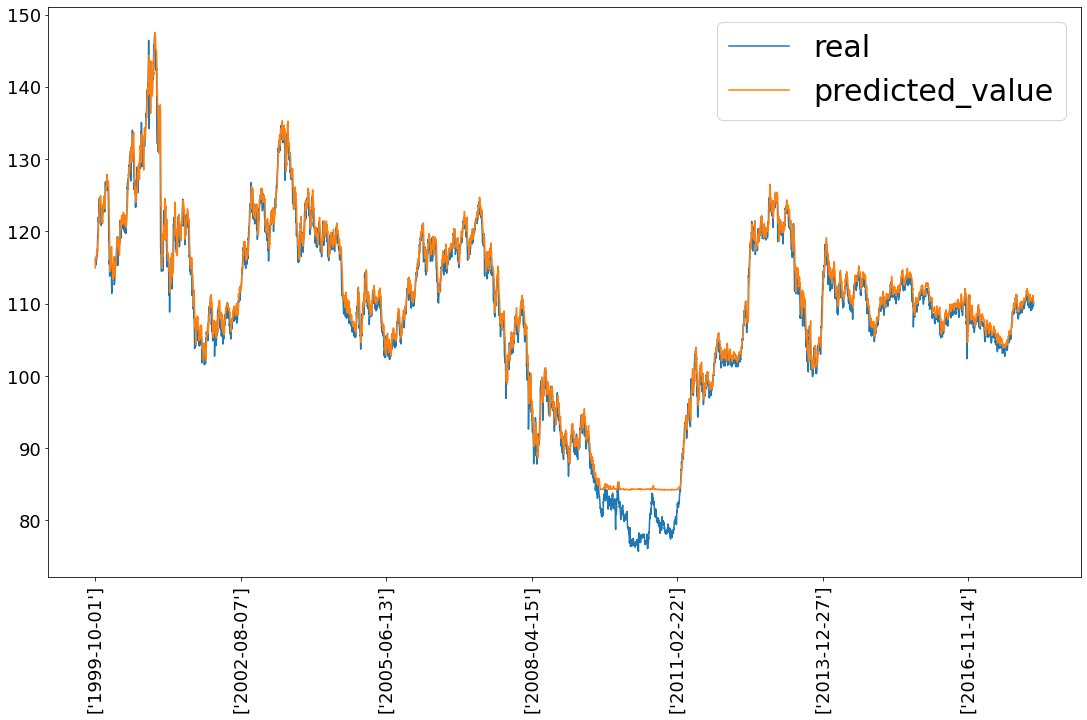

In [ ]:
# Generate predicted y values as rates.
predicted_y = model.predict(X_test)
Row_predicted_y = sc.inverse_transform(predicted_y)
Row_Y_test = sc.inverse_transform(Y_test)

# For checking minimum gap and maximum gap
print(Row_predicted_y)
print(Row_Y_test)
min, max = 9999, 0
for p, t in zip(Row_predicted_y, Row_Y_test):
  gap = abs(p - t)
  if gap < min: min = gap
  if gap > max: max = gap
print("min is", min)
print("max is", max)


# Evaluate mean square errors. The smaller is the better
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Row_Y_test, Row_predicted_y)

# Create X labels
date = pd.read_csv(HIST_PATH, header=1, usecols=[0], date_parser=True)
split_index = int(len(prices) * 0.5)
date_np = date[split_index:].to_numpy()
date_np = date_np[:len(Row_Y_test)]
xlabels = []
for i in range(0, len(date_np), len(date_np) // 9):
  xlabels.append(date_np[i])
xlabels = np.array(xlabels)


# plot the result
fig, ax = plt.subplots()

# Show actual chart
ax.plot(np.arange(len(Row_Y_test)), Row_Y_test, label="real")
# Show prediction chart
ax.plot(np.arange(len(Row_Y_test)), Row_predicted_y, label="predicted_value")
fig.set_size_inches(18.5, 10.5)

ax.set_xticklabels(xlabels, rotation=90, fontsize=18)
plt.tick_params(labelsize=18)


# showing legends more bigger
ax.legend(prop={'size': 30})

# measuring the runtime
end_time = time.process_time()
runtime = end_time - start_time


# score
score = MSE * runtime
print("MSE ", MSE, "\nprocess_time", runtime, "\nscore ", score)

In [ ]:
# add result to ranking
series = pd.Series([name, score, MSE, runtime, INPUT_LEN, EPOCHS, BATCH_SIZE, numOfHiddenLayers], index=df_ranking.columns)
print(series)
df_ranking = df_ranking.append(series, ignore_index=True)
df_ranking = df_ranking.sort_values(by=['score'])
df_ranking = df_ranking.drop_duplicates()
display(df_ranking)
df_ranking.to_csv(RANKING_PATH,index=False)

name                lauren
score            19.625277
MSE               4.109381
runtime           4.775725
input len               20
epochs                  10
batch size              50
hidden layers            5
dtype: object


,name,score,MSE,runtime,input len,epochs,batch size,hidden layers
0,Hiro test5,11.940413,2.032155,5.875740,15,5,32,2
1,Hiro test2,12.668916,1.614539,7.846772,10,5,10,3
2,Hiro test6,12.672963,2.032155,6.236219,15,5,32,2
6,lauren,19.625277,4.109381,4.775725,20,10,50,5
3,Hiro test3,19.770041,1.727522,11.444163,20,10,20,20
4,Hiro test1,29.605780,2.331352,12.698976,2,2,2,2
5,Hiro test4,690.192848,4.015502,171.882090,10,100,10,5
